<a href="https://colab.research.google.com/github/yesyell/DA_School_1/blob/main/%EB%94%A5%EB%9F%AC%EB%8B%9D/%EB%94%A5%EB%9F%AC%EB%8B%9D_%ED%94%84%EB%A1%9C%EC%84%B8%EC%8A%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 환경 준비

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# 데이터 준비

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 [==============================] - 0s 0us/step


왜 255로 나눌까?

1. **안정적인 학습**: 이미지의 픽셀 값이 크면, 컴퓨터는 이 값을 처리하는 데 어려움을 겪을 수 있습니다. 0과 1 사이의 값으로 바꾸면 컴퓨터가 더 쉽게 데이터를 학습할 수 있어요.
2. **빠른 학습**: 작은 값으로 데이터를 바꾸면, 컴퓨터는 학습하는 속도가 빨라집니다.
3. **계산 문제 방지**: 큰 숫자를 계속 계산하다 보면 컴퓨터가 계산에 틀릴 확률이 높아집니다. 작은 값으로 바꾸면 이런 문제를 줄일 수 있어요.
4. **더 좋은 결과**: 픽셀 값을 0과 1 사이로 바꾸면, 컴퓨터가 이미지를 더 잘 인식하고, 더 좋은 결과를 얻을 수 있습니다.

간단히 말해서, 이미지의 픽셀 값을 0과 1 사이로 바꾸는 것은 컴퓨터가 이미지를 더 잘 이해하고 빠르게 학습하게 만드는 방법입니다!

# 모델 구성

In [3]:
model = Sequential([
    Flatten(input_shape=(28, 28)), # 입력
    Dense(128, activation='relu'), # 은닉
    Dense(10, activation='softmax') # 출력
])

- `Sequential` 모델은 레이어가 순차적으로 연결된 간단한 선형 스택으로 구성됩니다. 여기에 추가할 레이어를 리스트 형태로 전달할 수 있습니다.
- `Flatten` 레이어는 입력 데이터를 1차원 배열로 평탄화합니다. 이 예제에서는 MNIST 이미지의 크기가 28x28이므로 input_shape=(28, 28)로 지정됩니다. 이 레이어는 데이터의 차원을 변경하기만 하므로 학습되는 가중치가 없습니다.
- `Dense` 레이어는 완전 연결 레이어로, 이전 레이어의 모든 뉴런과 연결됩니다. 이 레이어에는 128개의 뉴런이 있으며, 활성화 함수로 `ReLU` (Rectified Linear Unit)를 사용합니다. ReLU는 음수 값을 0으로 만드는 간단한 비선형 함수입니다.
    - 신경망의 은닉층에 활성화 함수를 사용하는 이유:

    1. **더 복잡한 것을 학습**: 활성화 함수가 없으면, 신경망은 기본적인 문제만 해결할 수 있어요. 활성화 함수를 넣으면, 신경망이 더 복잡한 패턴도 알아볼 수 있게 돼요.
    2. **'뇌'처럼 동작**: 우리 뇌의 뉴런은 특정 신호가 오면 활동을 시작하죠. 활성화 함수는 이런 동작을 컴퓨터에게도 가르쳐줍니다.

    => 활성화 함수는 신경망에게 "더 똑똑하게" 동작하도록 도와줍니다!
- 출력 레이어는 10개의 뉴런을 가지며, 각 뉴런은 MNIST 데이터셋의 10개 클래스 (0부터 9까지의 숫자)에 대응합니다. `softmax` 활성화 함수는 출력을 확률로 변환하여 다중 클래스 분류 문제에 적합합니다.

In [4]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

- **`optimizer`**: 여기에서는 'adam' 최적화 알고리즘을 사용합니다. 이는 경사 하강법을 기반으로 하는 효과적인 최적화 방법 중 하나입니다.
- **`loss`**: 손실 함수로 'sparse_categorical_crossentropy'를 사용합니다. 이는 다중 클래스 분류 문제에서 주로 사용되며, 실제 레이블과 예측 레이블 간의 차이를 측정합니다.
- **`metrics`**: 훈련 중에 추적할 메트릭을 지정합니다. 여기에서는 'accuracy'를 사용하여 분류 정확도를 추적합니다.

이렇게 구성된 모델은 이미지를 입력으로 받아 10개의 숫자 클래스 중 하나로 분류하는 역할을 합니다.

# 모델 실행

모델을 훈련 데이터에 대해 훈련하고 검증 데이터로 검증합니다.

In [5]:
history = model.fit(x_train, y_train, epochs=5,
                    validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 19s 9ms/step - loss: 0.2546 - accuracy: 0.9273 - val_loss: 0.1359 - val_accuracy: 0.9597
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1112 - accuracy: 0.9665 - val_loss: 0.0944 - val_accuracy: 0.9715
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0770 - accuracy: 0.9762 - val_loss: 0.0833 - val_accuracy: 0.9740
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0582 - accuracy: 0.9818 - val_loss: 0.0793 - val_accuracy: 0.9760
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0448 - accuracy: 0.9860 - val_loss: 0.0827 - val_accuracy: 0.9736


**`model.fit`**

- **`x_train, y_train`**: 훈련 데이터셋의 입력 *x* 및 레이블 *y* 입니다. 이 예제에서는 MNIST 데이터셋을 사용하므로 *x_*train은 이미지 데이터이고 *y_*train은 해당 이미지의 숫자 레이블입니다.
- **`epochs`**: 전체 훈련 데이터셋에 대해 반복할 에폭 수입니다. 에폭이란 전체 훈련 데이터셋을 한 번 통과하는 것을 의미합니다. 여기서는 에폭 수를 5로 설정하였으므로, 전체 훈련 데이터셋은 모델에 총 5번 통과됩니다.
- **`validation_data`**: 검증 데이터셋의 입력 및 레이블로, 모델의 성능을 평가하는 데 사용됩니다. 여기서는 테스트 데이터셋 (*x*test,*y*test)을 검증 데이터로 사용하였습니다. 각 에폭 후에 검증 데이터셋을 사용하여 모델의 성능을 평가하고, 과대적합 등의 문제를 감지할 수 있습니다.

1. **Epoch (에포크)**:
    - 에포크는 전체 훈련 데이터셋에 대해 학습 알고리즘이 완료하는 전체 과정을 의미합니다.
    - 예를 들어, 에포크가 5라면, 전체 훈련 데이터셋을 5번 사용하여 모델을 학습시킵니다.
    - 에포크가 너무 낮으면 모델은 충분히 학습되지 않을 수 있고, 너무 높으면 과적합(overfitting)의 위험이 있습니다.
2. **Batch Size (배치 크기)**:
    - 배치 크기는 모델을 한 번 업데이트할 때 사용하는 샘플의 수를 의미합니다.
    - 예를 들어, 1000개의 샘플이 있고 배치 크기가 10이라면, 모델은 10개의 샘플을 사용하여 한 번 업데이트하며, 전체 데이터셋에 대해서는 100번의 업데이트를 수행합니다.
    - 큰 배치 크기는 더 많은 메모리를 필요로 하며, 작은 배치 크기는 업데이트가 더 자주 발생하므로 학습 시간이 오래 걸릴 수 있습니다.
    - 적절한 배치 크기 선택은 학습 속도와 성능의 균형을 맞추는 데 중요합니다.

  => 간단히 말해, **에포크**는 전체 데이터셋을 얼마나 많이 사용하여 학습할지 결정하고, **배치 크기**는 한 번에 얼마나 많은 데이터를 사용하여 모델을 업데이트할지 결정합니다.

**반환값 `history`**

- **`history`**: **`model.fit`**의 반환값으로, 훈련 중에 발생한 여러 사항을 담고 있는 객체입니다. **`history.history`** 딕셔너리에는 훈련 및 검증 과정에서의 손실과 메트릭 값 등이 포함되어 있습니다. 이를 사용하여 에폭별 성능 변화를 그래프로 시각화할 수 있습니다.

결국 이 코드는 주어진 훈련 데이터를 사용하여 모델을 훈련시키고, 주어진 검증 데이터를 사용하여 모델의 성능을 평가하는 과정을 수행하며, 훈련 과정의 상세 정보를 **`history`** 객체에 저장합니다.

# 결과 확인

훈련과 검증의 정확도와 손실을 확인합니다. 10개의 분류로 잘 배정되었는지를 확인해야하기 때문에 accuracy를 사용하고 val_accuracy를 활용하여 검증 데이터를 잘 예측하는지도 파악합니다.

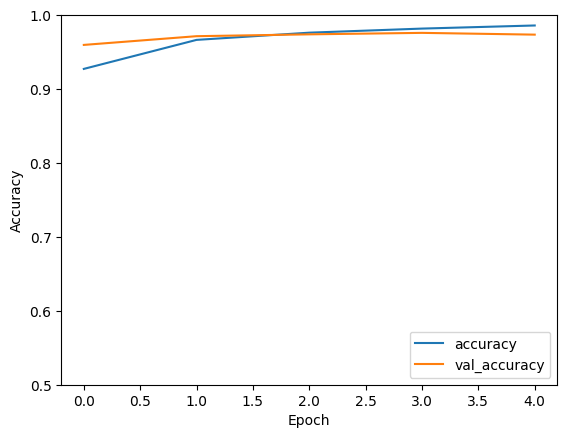

In [6]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

313/313 [==============================] - 2s 7ms/step


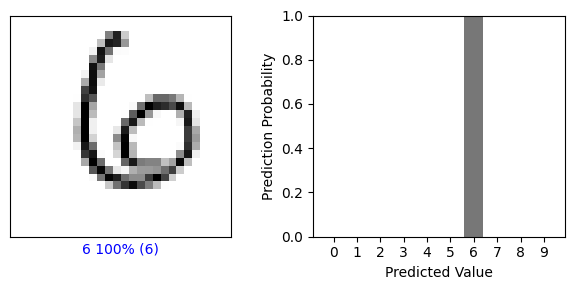

In [7]:
#결과 시각화 정리
import numpy as np

# 테스트 데이터를 사용하여 예측 수행
predictions = model.predict(x_test)

def display_prediction(index, predictions_array, true_label, img):
    plt.figure(figsize=(6,3))

    # 이미지 출력
    plt.subplot(1, 2, 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img[index], cmap=plt.cm.binary)

    # 예측 결과 출력
    predicted_label = np.argmax(predictions_array[index])
    if predicted_label == true_label[index]:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                         100*np.max(predictions_array[index]),
                                         true_label[index]),
                                         color=color)

    # 예측 확률 막대그래프 출력
    plt.subplot(1, 2, 2)
    plt.bar(range(10), predictions_array[index], color="#777777")
    plt.ylim([0, 1])
    plt.xticks(range(10))
    plt.ylabel('Prediction Probability')
    plt.xlabel('Predicted Value')

    plt.tight_layout()
    plt.show()

# 첫 번째 예측 결과 시각화
display_prediction(100, predictions, y_test, x_test)

# 두 번째 예측 결과 시각화 (실제로 코드를 실행할 수 있다면 이 부분을 주석 해제하여 실행하세요)
# display_prediction(1, predictions, y_test, x_test)